<a href="https://colab.research.google.com/github/Perkins2001/MAT-421/blob/main/HW_17_4%2C17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.4
Rather than use linear interpolation, I will demonsrate Polynomial Interpolation which creates a single polynomial connecting points of a set.

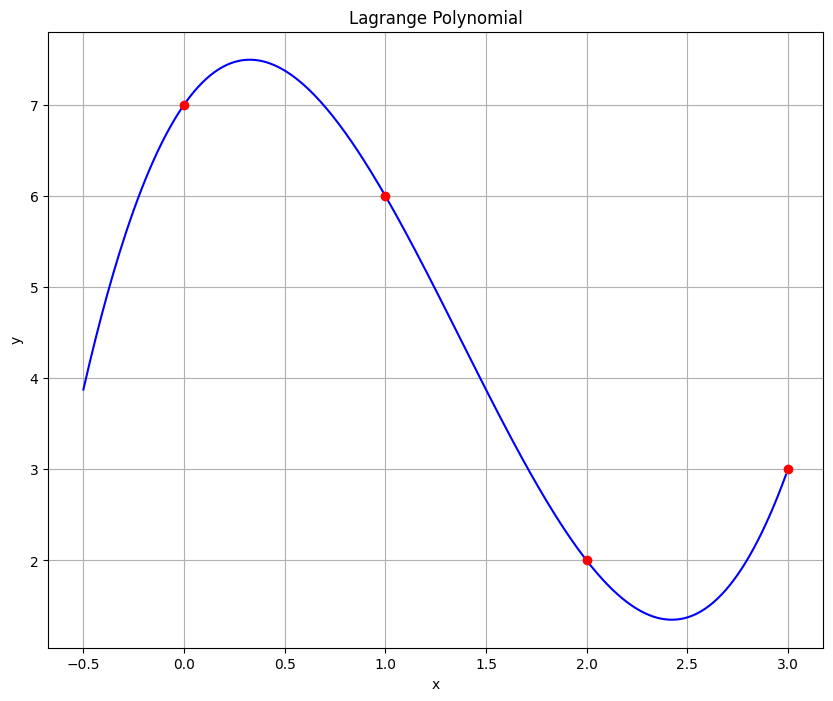

In [13]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = [0, 1, 2, 3]
y = [7, 6, 2, 3]

x_new = np.arange(-.5, 3, 0.01)

f = lagrange(x, y)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This is much more flexible than linear or cubic interpolation but it can be more computaionally expensive and is not as easily modified as cubic.

17.5
Newton's Polynomoial interpolation is yet another method useful for construction of a polynomial through a set of given data points.


First we need a function to calcualte the devided differences

In [14]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

Then we need a function to exavluate newton's polynomial for x

In [15]:
def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

Now we define the data and create the plot

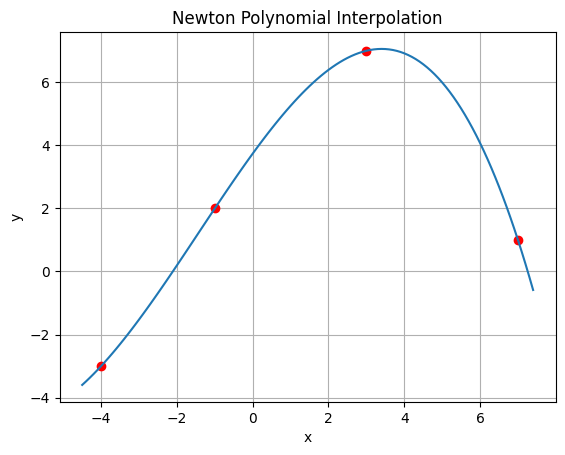

In [26]:
x = np.array([-4,-1,3,7])
y = np.array([-3,2,7,1])
a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-4.5, 7.5, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure
plt.title('Newton Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)